# **Problem 3, Parts G-I: Stochastic Gradient Descent with a Larger Dataset**

Use this notebook to write your code for problem 3 parts G-I by filling in the sections marked `# TODO` and running all cells.


In [ ]:
# Setup.

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 3G: Perform SGD with the new dataset

For the functions below, you may re-use your code from parts 3D-F. Note that you can now modify your SGD function to return the final weight vector instead of the weights after every epoch.



In [ ]:
def loss(X, Y, w):
    '''
    Calculate the squared loss function.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.

    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''

    #==============================================
    # TODO: Implement the SGD loss function.
    #==============================================

    loss_score = 0
    for i in range(len(X)):
      loss_score += (Y[i] - np.dot(np.transpose(w), X[i]))**2
    return loss_score

def gradient(x, y, w):
    '''
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.

    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.

    Output:
        The gradient of the loss with respect to x, y, and w.
    '''

    #==============================================
    # TODO: Implement the gradient of the loss function.
    #==============================================

    return 2*x*(np.dot(np.transpose(w), x) - y)

def SGD(X, Y, w_start, eta, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.

    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''

    #==============================================
    # TODO: Implement the SGD algorithm.
    #==============================================

    loss_arr = []
    w = np.array(w_start)
    for i in range(N_epochs):
      random_data_idx = np.random.permutation(range(len(X)))
      for j in random_data_idx:
        w = w - eta * gradient(X[j], Y[j], w)
      loss_arr.append(loss(X,Y,w))
    return w , loss_arr

Next, we need to load the dataset. In doing so, the following function may be helpful:



In [ ]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.

    Inputs:
        filename: GeneratorExitiven as a string.

    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

Now, load the dataset in ``sgd_data.csv`` and run SGD using the given parameters; print out the final weights.

In [ ]:
#==============================================
# TODO:
# (1) load the dataset
# (2) run SGD using the given parameters
# (3) print out the final weights.
#==============================================

# The following should help you get started:

data = load_data('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set1/src/data/sgd_data.csv')

X = []
Y = []


for i in range(len(data)):
  X.append(np.array([1,data[i][0], data[i][1], data[i][2], data[i][3]]))
  Y.append(data[i][4])

b_start = 0.001
w_start = [b_start, 0.001, 0.001, 0.001, 0.001]
eta = np.exp(-15)

N_epochs = 1000

W,losses = SGD(X, Y, w_start, eta, N_epochs)

print(W)

[ -0.22789116  -5.9785181    3.98840583 -11.85699021   8.91131292]


# Problem 3H: Convergence of SGD

This problem examines the convergence of SGD for different learning rates. Please implement your code in the cell below:

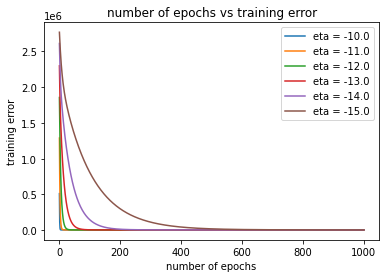

In [ ]:
#==============================================
# TODO: create a plot showing the convergence
# of SGD for the different learning rates.
#==============================================

b_start = 0.001
w_start = [b_start, 0.001, 0.001, 0.001, 0.001]
eta = [np.exp(-10), np.exp(-11), np.exp(-12), np.exp(-13), np.exp(-14), np.exp(-15)]
N_epochs = 1000

for i in range(len(eta)):
  W,losses = SGD(X, Y, w_start, eta[i], N_epochs)
  plt.plot(np.linspace(1,N_epochs,N_epochs),losses, label = "eta = " + str(np.log(eta[i])))

plt.legend()
plt.xlabel("number of epochs")
plt.ylabel("training error")
plt.title("number of epochs vs training error")
plt.show()

# Problem 3I

Provide your code for computing the least-squares analytical solution below.



In [ ]:
#==============================================
# TODO: implement the least-squares
# analytical solution.
#==============================================

part_1 = 0
part_2 = 0
for i in range(len(X)):
  part_1 += np.outer(X[i], np.transpose(X[i]))
  part_2 += X[i] * Y[i]

w = np.matmul(np.linalg.inv(part_1),part_2)

print(w)



[ -0.31644251  -5.99157048   4.01509955 -11.93325972   8.99061096]
